# Gather Data

#### Load required package to perform the project work

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import json
import requests
import re
%matplotlib inline

#### Get 'twitter-archive-enhanced.csv' by loading CSV file

In [311]:
tw_archive_enhance = pd.read_csv('twitter-archive-enhanced.csv')

#### Get 'image-predictions.tsv' by loading CSV file from web site

In [312]:
csv_url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
req = requests.get(csv_url)
url_content = req.content
csv_file = open('image-predictions.tsv', 'wb')
csv_file.write(url_content)
csv_file.close()

In [313]:
#url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
tw_img_pred=pd.read_csv('image-predictions.tsv',sep='\t')

#### Read 'tweet-json.txt' from line to line and extract target fields

- I cannot get developer account to use twitter API for extracting data. please have the code for your review. And I will read tw_json.text for this project.


- twitter_api sample code

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

#Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

#NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
#df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
#change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
#NOTE TO REVIEWER: this student had mobile verification issues so the following
#Twitter API code was sent to this student from a Udacity instructor
#Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

#Query Twitter's API for JSON data for each tweet ID in the Twitter archive

count = 0
fails_dict = {}
start = timer()

#Save each tweet's returned JSON as a new line in a .txt file

with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [314]:
tweet_id=[]
retweet_cnt=[]
favorite_cnt=[]

with open('tweet-json.txt') as file:
    for line in file:
        data={}
        data=json.loads(line)
        tweet_id.append(data['id'])
        retweet_cnt.append(data['retweet_count'])
        favorite_cnt.append(data['favorite_count'])

tw_json=pd.DataFrame({'tweet_id':tweet_id, 'retweet_cnt':retweet_cnt, 'favorite_cnt':favorite_cnt})

# Assess Data

##### view the basic info of 'tw_archive_enhance'

In [315]:
tw_archive_enhance_copy=tw_archive_enhance.copy()
tw_archive_enhance_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Tip-1: From the above, data types of certain variables are not proper for the nature of itself. For example, 'tweet_id' shall be in the format of string instead of integer. 'timestamp' shall be in the format of datetime instead of string. 

In [316]:
tw_archive_enhance_copy.iloc[313]

tweet_id                                                     835246439529840640
in_reply_to_status_id                                               8.35246e+17
in_reply_to_user_id                                                 2.62596e+07
timestamp                                             2017-02-24 21:54:03 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          @jonnysun @Lin_Manuel ok jomny I know you're e...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                            960
rating_denominator                                                            0
name                                    

In [317]:
list(tw_archive_enhance_copy[tw_archive_enhance_copy.rating_numerator==960]['text'])

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"]

#### Tip-2: from the above, the rating_numerator is 960 for this record is not corect when I observe original twitter text. it shall be 13 in this case. Same case also happens to denominator. The correct value shall 10 instead of 00

In [318]:
tw_archive_enhance_copy.expanded_urls.str.len().sort_values(ascending=False).head(5)

702    511.0
447    511.0
446    511.0
811    511.0
391    440.0
Name: expanded_urls, dtype: float64

In [319]:
tw_archive_enhance_copy.iloc[702]['expanded_urls']

'https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1'

#### Tip-3: certain observations which 'expanded_urls' have duplicated values in one cell for example, record 702.

In [320]:
tw_archive_enhance_copy[tw_archive_enhance_copy.name=='O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


In [321]:
list(tw_archive_enhance_copy[tw_archive_enhance_copy.name=='O']['text'])

["This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC"]

#### Tip-4: from my observation, the record 775 which name='O' is wrongly extracted from original text. The correct value shall be O'Malley instead.

In [322]:
names_an=tw_archive_enhance_copy[tw_archive_enhance_copy.name=='an']['text'] 

In [323]:
for index in names_an.index:
    print(index)
    print(names_an[index]+'\n')

759
RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR

1025
This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt

1362
This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR

2204
This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg

2333
This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL

2335
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv

2349
This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDd

In [324]:
tw_archive_enhance_copy.iloc[2335]

tweet_id                                                     666287406224695296
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2015-11-16 16:11:11 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is an Albanian 3 1/2 legged  Episcopalian...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/666287406...
rating_numerator                                                              1
rating_denominator                                                            2
name                                    

#### Tip-5:record 2335 which name is wrongly extracted from original text. The correct value shall be Albanian instead. Both rating_numerator and denominator are incorrect neither.

In [325]:
names_o=tw_archive_enhance_copy[tw_archive_enhance_copy.name=='O']['text']
names_o.index

Int64Index([775], dtype='int64')

In [326]:
list(names_o)

["This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC"]

#### Tip-6: record 775 which name is wrongly extracted. The corect name shall be O'Malley instead

In [327]:
tw_archive_enhance_copy.retweeted_status_id.notnull().sum()

181

#### Tip-7: 'retweeted_status_id' is not empty. We only want original rating so we need to remove those retweeted_status_id from the observations

In [328]:
tw_img_pred_copy=tw_img_pred.copy()
tw_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Tip-8: 'tweet_id' is supposed to be string format instead of interger now.

In [329]:
tw_json_copy=tw_json.copy()
tw_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id        2354 non-null int64
retweet_cnt     2354 non-null int64
favorite_cnt    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Tip-9: 'tweet_id' is supposed to be string format instead of interger now.

# Summary of Data Issues

### Quality
##### `tw_archive_enhance` table
- Erroneous datatypes(tweet_id,  is numbers instead of string)
- Erroneous datatypes (timestamp is string instead of datetime)
- certain record which rating_numerator has abnormal value
- certain record of rating_denominator has abnormal value
- certain records of expand_urls have duplicated values
- certain records of name are wrongly extracted
- retweet_status_id with values is not in the scope of project since we want orginal ratings only 

##### `tw_img_pred` table
- tweet_id is supposed to be string instead of integer 

##### `adverse_reactions` table
- tweet_id is supposed to be string instead of integer 


#### Tidiness
- set `tweet_id` as primary key for 3 tables and merge all of them  
- doggo,floofer,pupper,puppo in `tw_archive_enhance` table should be merged into one column `stage` 

# Clean

### Quality
#### 1. Erroneous datatypes('tweet_id')  is integer instead of string in table `tw_archive_enahnced`

#### Define Method
Assign string data type to `tweet_id` by using `astype` method 

In [330]:
tw_archive_enhance_copy.tweet_id = tw_archive_enhance_copy.tweet_id.astype(str)

#### Test: the data type of tweet_id has changed to 'object'

In [331]:
print(tw_archive_enhance_copy.tweet_id.dtype)

object


#### 2. Erroneous datatypes ('timestamp') is string instead of datetime in table `tw_archive_enahnced`

#### Define Method
Assign string data type to `timestamp` by using `astype` method 

In [332]:
tw_archive_enhance_copy.timestamp = tw_archive_enhance_copy.timestamp.astype('datetime64')

#### Test: the data type has changed to dattime format

In [333]:
print(tw_archive_enhance_copy.timestamp.dtype)

datetime64[ns]


#### 3. duplicated contents appear in `expand_urls` in table `tw_archive_enhance`

#### Define Method
Remove duplicated contents by using string function and create new variable of `expanded_urls_clean`

In [334]:
expanded_urls = tw_archive_enhance_copy.expanded_urls.dropna()
expanded_urls_clean = expanded_urls.apply(lambda x: x.split(',')[0])
expanded_urls_clean.name='expanded_urls_clean'
tw_archive_enhance_copy = tw_archive_enhance_copy.join(expanded_urls_clean,how='left')

#### Test: from the sample observation, there is no duplicated value in one cell.

In [335]:
tw_archive_enhance_copy.iloc[702]['expanded_urls_clean']

'https://twitter.com/dog_rates/status/779834332596887552/photo/1'

#### 4. 'rating_numerator' is incorrectly extracted and data type shall be float

#### Define Method
Replace abnormal value with correct value from text and assign correct data type as float.

In [336]:
tw_archive_enhance_copy[tw_archive_enhance_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [337]:
print(tw_archive_enhance_copy.iloc[45]['text'])
print(tw_archive_enhance_copy.iloc[340]['text'])
print(tw_archive_enhance_copy.iloc[695]['text'])
print(tw_archive_enhance_copy.iloc[763]['text'])
print(tw_archive_enhance_copy.iloc[1689]['text'])
print(tw_archive_enhance_copy.iloc[1712]['text'])

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [338]:
tw_archive_enhance_copy.rating_numerator=tw_archive_enhance_copy.rating_numerator.astype(float)
print(tw_archive_enhance_copy.rating_numerator.dtype)

float64


In [339]:
tw_archive_enhance_copy.at[45,'rating_numerator']=13.5
tw_archive_enhance_copy.at[340,'rating_numerator']=9.75
tw_archive_enhance_copy.at[695,'rating_numerator']=9.75
tw_archive_enhance_copy.at[763,'rating_numerator']=11.27
tw_archive_enhance_copy.at[1689,'rating_numerator']=9.5
tw_archive_enhance_copy.at[1712,'rating_numerator']=11.26

#### Test: the value of rating_numerator has been updated sucessfully

In [340]:
tw_archive_enhance_copy[tw_archive_enhance_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
340,"RT @dog_rates: This is Logan, the Chow who liv...",9.75
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1689,I've been told there's a slight possibility he...,9.50
1712,Here we have uncovered an entire battalion of ...,11.26


#### 5. 'rating_denominator' has abnormal value to be modified and data type shall be float instead which is consistent with rating_numerator

#### Define Method
REplace abnormal value with correct value: denominator = 10

In [341]:
tw_archive_enhance_copy.rating_denominator=tw_archive_enhance_copy.rating_denominator.astype(float)
print(tw_archive_enhance_copy.rating_denominator.dtype)

float64


In [342]:
tw_archive_enhance_copy.iloc[313]['text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [343]:
tw_archive_enhance_copy.at[313,'rating_denominator']=10

#### Test: the value of denominatror has been updated to 10

In [344]:
tw_archive_enhance_copy.at[313,'rating_denominator']

10.0

#### 6. Record 2335 has wrong name extracted and rating of both numerator and denominator.

#### Define Method
Replace wrong name 'an' with correct value 'Albanian' and update both 'rating_numerator' and 'rating_denominator'

In [345]:
tw_archive_enhance_copy.iloc[2335]['text']

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [346]:
index = 2335
modified_name ='Albanian'
modified_numerator =9
modified_denominator=10
tw_archive_enhance_copy.at[index,'name']=modified_name
tw_archive_enhance_copy.at[index,'rating_numerator']=modified_numerator
tw_archive_enhance_copy.at[index,'rating_denominator']=modified_denominator

#### Test: the value of name has been updated to Albanian. Both of 'rating_numerator','rating_denominator' have been update to correct values 9 and 10

In [347]:
tw_archive_enhance_copy.iloc[2335][['name','rating_numerator','rating_denominator']]

name                  Albanian
rating_numerator             9
rating_denominator          10
Name: 2335, dtype: object

#### 7.Record 775 has wrong name extracted.

#### Define Method
Replace wrong name 'O' with correct value 'Albanian' and update both 'rating_numerator' and 'rating_denominator'

In [348]:
tw_archive_enhance_copy.iloc[775]['text']

"This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC"

In [349]:
index = 775
modified_name ="O'Malley"
tw_archive_enhance_copy.at[index,'name']=modified_name

#### Test: The name of record 775 has been updated to O'Malley

In [350]:
tw_archive_enhance_copy.iloc[775]['name']

"O'Malley"

#### 8. there are still many invalid names which features are starting with lower case form the observation

#### Define Method
I will identify all of them and set to 'None'. 

In [351]:
index = tw_archive_enhance_copy[tw_archive_enhance_copy.name.str.islower()]['name'].index
update_name = pd.Series('None', name='name', index=index)
update_name

22      None
56      None
118     None
169     None
193     None
        ... 
2349    None
2350    None
2352    None
2353    None
2354    None
Name: name, Length: 108, dtype: object

In [352]:
tw_archive_enhance_copy.update(update_name)

In [353]:
tw_archive_enhance_copy[tw_archive_enhance_copy.name.str.islower()]['name']

Series([], Name: name, dtype: object)

#### 9.retweet_status_id with values is not in the scope of project since we want orginal ratings only

#### Define Method
remove records which 'retweet_status_id' has values and drop columns of 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'

In [354]:
tw_archive_enhance_copy = tw_archive_enhance_copy[tw_archive_enhance_copy.retweeted_status_id.isnull()]

In [355]:
tw_archive_enhance_copy.drop(columns=['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp']
                        ,inplace=True)

#### Test: the removal of retweet rating has been done.

In [356]:
tw_archive_enhance_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'expanded_urls_clean'],
      dtype='object')

#### 9.'tweet_id' shall be string instead of integer in both tables 'tw_img_pred' and 'tw_json'

#### Define Method
convert data types of both variables to string

In [357]:
tw_img_pred_copy.tweet_id=tw_img_pred_copy.tweet_id.astype(str)
tw_json_copy.tweet_id=tw_json_copy.tweet_id.astype(str)

#### Test: the type of tweet_id has been changed to 'object' in both 'tw_img_pred' and 'tw_json'

In [358]:
print(tw_img_pred_copy.tweet_id.dtype)

object


In [359]:
print(tw_json_copy.tweet_id.dtype)

object


### Tidiness
#### 1. set `tweet_id` as primary key for 3 tables and merge all of them and create new dataframe named 'df'

#### Define Method
Merge 3 tables by using common key `tweet_id` by using pandas `join` method 

In [360]:
df=  tw_archive_enhance_copy
df = tw_archive_enhance_copy.set_index('tweet_id').join(tw_img_pred_copy.set_index('tweet_id'),how='inner')
df = df.join(tw_json_copy.set_index('tweet_id'),how='inner')
df.reset_index(inplace=True)

#### 2. doggo,floofer,pupper,puppo in the new dataframe should be merged into one column `stage`. All of them shall be in one variable to follow the data tidiness rule. 

#### Define Method
Create new variable `stage` to consolidate all info of different stages `doggo,floofer,pupper,puppo`  

In [361]:
doggo = df.loc[df.doggo=='doggo']['doggo']
floofer = df.loc[df.floofer=='floofer']['floofer']
pupper = df.loc[df.pupper=='pupper']['pupper']
puppo = df.loc[df.puppo=='puppo']['puppo']

In [362]:
stage = doggo.append([floofer,pupper,puppo])
stage.name='stage'

- Ignore duplicated value drop variables of `doggo,floofer,pupper,puppo` 

In [363]:
stage = stage[stage.index.value_counts()==1]
df = df.join(stage,how='left')
df.stage.fillna(value=np.nan,inplace=True)
df.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'],inplace=True)

### Create final `twitter_archinve_master.csv` and pick up selected columns

In [364]:
df_clean=df[['tweet_id', 'timestamp','rating_numerator','rating_denominator', 'name', 'expanded_urls_clean', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
    'p3_conf', 'p3_dog', 'retweet_cnt', 'favorite_cnt', 'stage']].copy()

In [365]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'expanded_urls_clean', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_cnt', 'favorite_cnt', 'stage'],
      dtype='object')

In [366]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 20 columns):
tweet_id               1994 non-null object
timestamp              1994 non-null datetime64[ns]
rating_numerator       1994 non-null float64
rating_denominator     1994 non-null float64
name                   1994 non-null object
expanded_urls_clean    1994 non-null object
jpg_url                1994 non-null object
img_num                1994 non-null int64
p1                     1994 non-null object
p1_conf                1994 non-null float64
p1_dog                 1994 non-null bool
p2                     1994 non-null object
p2_conf                1994 non-null float64
p2_dog                 1994 non-null bool
p3                     1994 non-null object
p3_conf                1994 non-null float64
p3_dog                 1994 non-null bool
retweet_cnt            1994 non-null int64
favorite_cnt           1994 non-null int64
stage                  295 non-null object
dtypes: bo

In [367]:
df_clean.to_csv('twitter_archive_master.csv',index=False)

# Analyze and Visualize Data

### Load `twitter_archive_master.csv` 

In [368]:
twitter_archive_master=pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.sample(3)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,expanded_urls_clean,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_cnt,favorite_cnt,stage
753,747219827526344708,2016-06-27 00:07:44,11.0,10.0,Atticus,https://twitter.com/dog_rates/status/747219827...,https://pbs.twimg.com/media/Cl6odlVWQAIy5uk.jpg,2,Shetland_sheepdog,0.548018,True,marmot,0.165503,False,collie,0.043003,True,1791,5792,NaN
1931,667160273090932737,2015-11-19 01:59:39,11.0,10.0,Bradlay,https://twitter.com/dog_rates/status/667160273...,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,1,golden_retriever,0.471351,True,miniature_poodle,0.091992,True,standard_poodle,0.087385,True,66,268,NaN
875,726887082820554753,2016-05-01 21:32:40,10.0,10.0,Blitz,https://twitter.com/dog_rates/status/726887082...,https://pbs.twimg.com/media/ChZr8SdWIAAVQKt.jpg,1,soft-coated_wheaten_terrier,0.515919,True,Irish_terrier,0.162655,True,Chesapeake_Bay_retriever,0.125182,True,1677,4195,NaN


## Insight-1: both Count of retweet and Count of favorite show very strong positive relationship as per observation. It can infer that one user has more numbers of retweet which are always accompanied with more numbers fo favorite in nature. If the user doesn't like the rating or comment, he would not retweet it. 

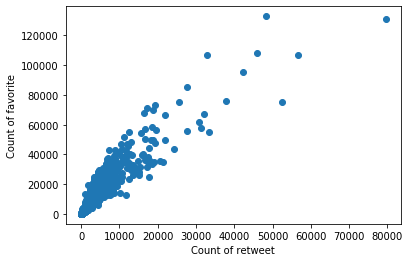

In [369]:
plt.scatter(data = twitter_archive_master, x = 'retweet_cnt', y = 'favorite_cnt');
plt.xlabel("Count of retweet");
plt.ylabel("Count of favorite");
plt.show()

## Insight-2: according to the data, the stage of `puppo` has the highest counts of favorite by users which dominates the rest categories. It can infer that the stage of 'puppo' is the most popular one among others and in the future we can try to analyze potential features to explain the behavior. 

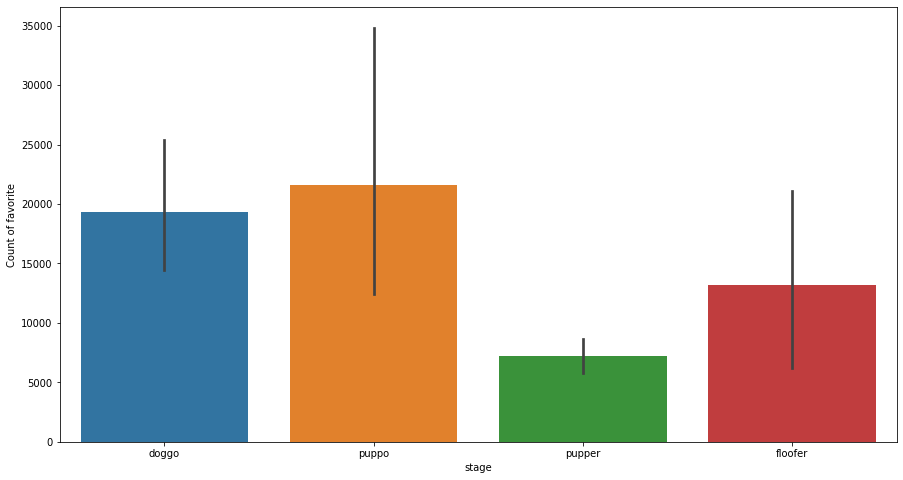

In [370]:
plt.figure(figsize = [15, 8])
ax = sb.barplot(data = twitter_archive_master, x = 'stage' ,y ='favorite_cnt')
plt.ylabel("Count of favorite");

## Insight-3: I create new variable `ratio` to decribe relationship of both rating_numerator and rating_denominator. When I observe decriptive values across 'stage', I found both floofer and puppo show similiar distribution in terms of mean, std and others. I also observed that there are extreme outlier values appeearing in pupper group which max value is 2.7 and min value is 0.3. It's obviously different from the rest. We can infer that the distribution of rating in puppo group is more volatile than the others.   

In [371]:
twitter_archive_master['ratio'] = twitter_archive_master.rating_numerator/twitter_archive_master.rating_denominator
stage_ratio = twitter_archive_master[twitter_archive_master.stage!='NotAvailiable'][['stage','ratio']]
stage_ratio.groupby('stage').describe()

ratio                                               
         count      mean       std  min    25%  50%  75%  max
stage                                                        
doggo     63.0  1.188889  0.147135  0.8  1.100  1.2  1.3  1.4
floofer    7.0  1.200000  0.115470  1.0  1.150  1.2  1.3  1.3
pupper   203.0  1.063680  0.172818  0.3  1.000  1.1  1.2  1.4
puppo     22.0  1.200000  0.130931  0.9  1.125  1.2  1.3  1.4

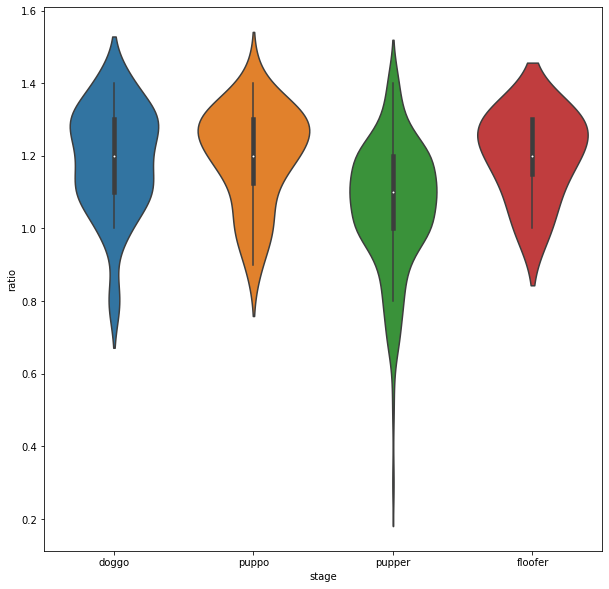

In [372]:
plt.figure(figsize=(10,10));
sb.violinplot(data =stage_ratio, x = 'stage', y = 'ratio');
plt.show()